In [23]:
#PHYS 434 Lab 2
#Ian McLean
#Student ID 1877711

In [24]:
# importing necessary packages to use later
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import statistics as st

__Variable of Transformation__

1). Draw a 1000 events sample xi,i=0,1,...999 using built-in distributions in scipy with Uniform density between 0 and 1.

Text(0.5, 1.0, '1000 Random Points from Uniform Distribution')

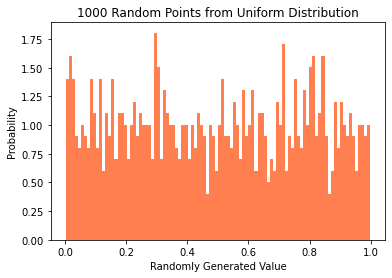

In [25]:
# importing uniform to use when generating the distribution required
from scipy.stats import uniform
# setting seed to get the same random generating every time
np.random.seed(10)

# creating array of 1000 random samples from uniform distribution between 0 and 1 and sorting them
x_i = np.sort(uniform.rvs(size=1000))

#plotting histogram of raw data with 100 bins to visualize the randomness of the data
plt.hist(x_i, density=True, histtype='stepfilled', bins = 100, color = "coral")

# Adding all labels, and details onto the plot
plt.xlabel('Randomly Generated Value')
plt.ylabel('Probability')
plt.title('1000 Random Points from Uniform Distribution')

In order to randomly generate 1000 points between [0,1] from the uniform distribution, the uniform.rvs() command can be utilized with size specified as 1000. This will generate the 1000 points, all between [0,1] and that is what is plotted above. The raw data can be visualized and it is clear to see that there is no true pattern visible for the data generation. 

2). For each value of xi, calculate the transformed value: $$u=x^{2}$$.

Text(0.5, 1.0, 'Transform of Random Points from Uniform Distribution')

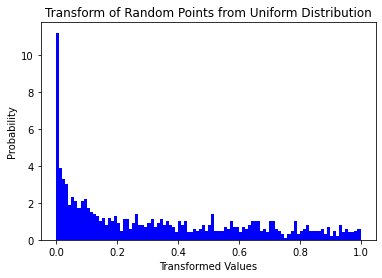

In [26]:
# applying the transform to each element in the x array to make new array
u = (x_i) ** 2

#plotting the data to see what the transform has done to it.
plt.hist(u, density=True, histtype='stepfilled', bins = 100, color = "blue")

# Adding all labels, and details onto the plot
plt.xlabel('Transformed Values')
plt.ylabel('Probability')
plt.title('Transform of Random Points from Uniform Distribution')


In order to calculate the transformed values of u, we can just raise the array of randomly generated values to the power of 2 and that will give us a u vector. It is simly applying the required transformation to each element in the original x array. The transformed distribution is visualized below and can be compared to the randomly generated data above. In this case, there is a much more defined trend where the data clumps higher at lower values, closer to 0. Whereas at higher values closer to 1, there is much less data. 

3). Draw the ui distribution. Plot the analytic solution g(u) in the same plot and compare the consistency. Show details about how you derive g(u)analyticially.

<function matplotlib.pyplot.show(close=None, block=None)>

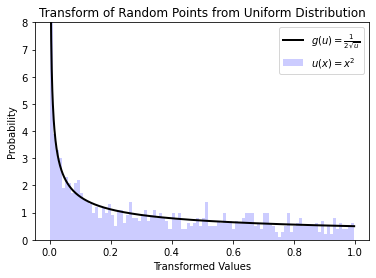

In [27]:
#plotting the data to see what the transform has done to it.
plt.hist(u, density=True, histtype='stepfilled', bins = 100, color = "blue", alpha = .2)

#plotting the analytically derived g(u) and setting plot limits
plt.plot(u,(1/(2*np.sqrt(u))), lw = 2, color = 'black')
plt.ylim(0,8)

# Adding all labels, details, and legend onto the plot
plt.xlabel('Transformed Values')
plt.ylabel('Probability')
plt.title('Transform of Random Points from Uniform Distribution')
plt.legend([r'$g(u) = \frac{1}{2\sqrt{u}}$', '$u(x) = x^2$'])
plt.show


In terms of the transformation, we can calculate it as such:

 
$$g(u) = f(x)|\frac{dx}{du}|$$
$$f(x) = 1$$
$$u=x^{2}$$
$$x = \sqrt{u}$$
$$dx = \frac{du}{2\sqrt{u}}$$
$$\frac{dx}{du} = \frac{1}{2\sqrt{u}}$$
$$g(u) = f(x) * \frac{1}{2\sqrt{u}}$$
$$g(u) = 1 * \frac{1}{2\sqrt{u}}$$
Thus, $$g(u) =  \frac{1}{2\sqrt{u}}$$

Essentially what is happening here, is that we are given the PDF u and we must use the given equation $g(u) = f(x)|\frac{dx}{du}|$ to find $g(u)$ analytically. We are given $f(x)$ from the fact that it is a uniform distribution from 0 to 1, and must calculate $|\frac{dx}{du}|$. Once this is done, it is just  a matter of multiplying $f(x)$ and $u(x)$ to see that the $g(u)$ fits the transformed data very well. It is clear that the data is very dense and frequent at lower values from the [0,1] range, whereas it is much less frequent closer to 1. There is this quick downward slope behavior which should be expected from some form of a $\frac{1}{\sqrt{u}}$ function.

4). Repeat Step 1,2,3 with one of the tranformation functions below. You and your teammate should select different transformed functions.
$$u=log(x)$$

<function matplotlib.pyplot.show(close=None, block=None)>

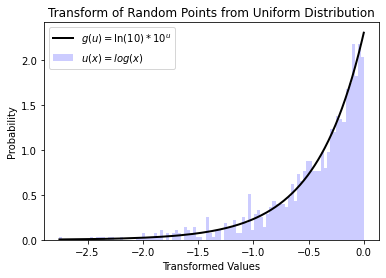

In [28]:
# for log case
# my selected function is u = log(x)

# applying new transform to the randomly generated values array from uniform distribution
u2 = np.log10(x_i)

# plotting the transformed data as histogram
plt.hist(u2, density=True, histtype='stepfilled', alpha=0.2, bins = 100, color = "blue")

# plotting analytically derived g(u)
plt.plot(u2,((np.log(10))*10**(u2)), color = 'black', lw = 2)

# Adding all labels, details, and legend onto the plot
plt.xlabel('Transformed Values')
plt.ylabel('Probability')
plt.title('Transform of Random Points from Uniform Distribution')
plt.legend([r'$g(u) = \ln(10)*10^{u}$', '$u(x) = log(x)$'])
plt.show


The same random 1000 datapoints were used again, and the transform applied this time was a logarithm of x. This data is plotted above in the very light blue, as the transform of the original random values from the uniform distribution. It is clear to see that the majority of transformed values clump closer to 0 and -1, whereas they trail off in the negative direction with barely any values. The $g(u)$ function (calculation below) fits the data as expected, where the transformed values grow very rapidly as the transformed value increases towards 0. 
The calculation of $g(u)$ goes as such:
$$g(u) = f(x)|\frac{dx}{du}|$$
$$f(x) = 1$$
$$u=\log(x)$$
$$x = 10^{u}$$
$$\ln{x} = \ln{10^{u}}$$
$$\ln{x} = u*\ln{10}$$
$$\frac{dx}{x} = \ln({10})du$$
$$\frac{dx}{du} = \ln{10}*x$$
$$\frac{dx}{du} = \ln{10}*(10^{u})$$
$$g(u) = 1 * \ln{10}*10^{u}$$
$$g(u) = \ln{(10)}*10^{u}$$

__Throwing two dices (3 points)__

1). Simulate a pair of dices 1000 times.

In [29]:
# necessary imports
from statistics import random

# setting a random seed to make sure future calculations are carried out with the same dice rolls
np.random.seed(10)

# defining first and second dice rolls independent. Adding 1 makes sure no decimal less than 1
dice_roll_1 = (6*np.random.uniform(0,1,1000))+1
dice_roll_2 = (6*np.random.uniform(0,1,1000))+1

# here is where all of the decimals are taken as integers between 1 and 6 (using their leading number)
dice_int1 = np.array(dice_roll_1, dtype = 'int')
dice_int2 =  np.array(dice_roll_2, dtype = 'int')

# initializing empty list to hold each set of rolls
list_of_pairs = []

# for each roll (1000), rolling die 1 and die 2 and appending that to the list as 1 roll event.
for i in range(len(dice_int1)):
    # refresh the cumulative pair list every time
    pair = []
    pair.append(dice_int1[i])
    pair.append(dice_int2[i])
    # add list of both rolls to total rolls list
    list_of_pairs.append(pair)

# example of output
print('1000 dice rolls have been simulated, and the first 10 rolls (as lists) are: '
      + str(list_of_pairs[:10]) + ' ...')

1000 dice rolls have been simulated, and the first 10 rolls (as lists) are: [[5, 3], [1, 5], [4, 3], [5, 4], [3, 2], [2, 1], [2, 6], [5, 3], [2, 4], [1, 2]] ...


Essentially what is happening here, is that each die roll is independent of eachother, so they can be simulated separately as if someone were to roll the first die, then the second and call it a roll. In this instance, the code does 1000 rolls in a for loop, and for each "roll", the first die is thrown followed by the second die and these are combined in a list and classified as 1 "roll" out of the 1000. These 1000 rolls are in another list which holds all of the roll events (also lists). Being that the list is so long, only the first 10 rolls have been printed.

2). Calculate the sum of each pair.

In [30]:
# calculating the dice sum as the sum of each die's value during the specific roll
dice_sum = dice_int1 + dice_int2
print('The first 10 sums of the dice rolls are: ' + str(dice_sum[:10]) + ' ...')

The first 10 sums of the dice rolls are: [8 6 7 9 5 3 8 8 6 3] ...


In order to calculate the sum of each pair, we know that each die that is rolled is independent of the other, so we can just sum to two lists that were previously created, element-wise, as there is one for each die roll. It is equivalent to rolling both at the same time and looking at the sum of the two dice thrown. As this is also a list of length 1000, only the first 10 sums have been printed. It is clear to see that this will correspond to the sum of the two values in each list of list from the previous part if one were to sum both of those values and compare.

3). Draw the distribution of the sum.

<function matplotlib.pyplot.show(close=None, block=None)>

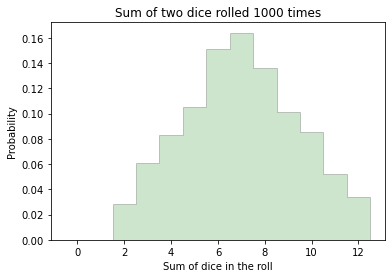

In [31]:
# plotting the distribution of the sums of each dice roll in a histogram
plt.hist(dice_sum, density=True, histtype='stepfilled', alpha=0.2, 
         bins = np.arange(14)-.5, color = 'green', edgecolor='black')

# Adding all labels, and details, to the plot
plt.xlabel('Sum of dice in the roll')
plt.ylabel('Probability')
plt.title('Sum of two dice rolled 1000 times')
plt.show


Intuitively, this plot makes sense as 

4). Calcualte mean and variance of the distribuion of the Sum.


In [32]:
# necessary imports
import statistics

# applying mean and variance functions
sum_mean = round(np.mean(dice_sum),2)
sum_variance = round((st.stdev(dice_sum))**2,3)

print('The mean of the distribution of this sum is: ' + str(sum_mean) +
     ' while the variance of the distribution of the sum is: ' + str(sum_variance))

The mean of the distribution of this sum is: 6.98 while the variance of the distribution of the sum is: 5.0


In order to calculate the mean of the distribution, we can just apply the mean function which sums up all of the sums in the array, and divides by the array's length. Then, the variance can be calculated as the square of the standard deviation of the array. Intuitively, the values make sense for a distribution which should tend normal, and can only have discrete values between 2 and 12.

Calculate the probability of Sevens (i.e. sum of two dices equals to 7) by taking the ratio of this number of Sevens to 1000. Please also evaluate the statistical uncertainty of the probability.

In [33]:
# mask and create new array where the only values are the 7's
sevens = dice_sum[dice_sum == 7]

# calculate probability as amount of sums of seven, divided by number of rolls
sevens_prob = len(sevens)/len(dice_sum)
print('The probability of the sum of two dices equals 7 is: ' + str(sevens_prob))

# evaluate statistical uncertainty as np(1-p) this is binomial
stat_error = round(np.sqrt(len(dice_sum)*((sevens_prob))*(1-(sevens_prob)))/(len(sevens)-1),3)
print('The statistical uncertainty of the probability is ' + str(stat_error))

The probability of the sum of two dices equals 7 is: 0.164
The statistical uncertainty of the probability is 0.072


In order to evaluate the probability of rolling a sum of 7, we must take the length of the list made by the number of seven sums rolled, and divide by the total number of rolls. This will give a probability of rolling a sum to 7 of .164. And in order to calculate the statistical error, we can assume it is a binomial error. Thus we can use the equation $\frac{\sqrt{npq}}{n - 1}$ as this is the standard deviation ($np(1-p)$) which is then divided by $n-1$ as the binomial error is calculated with this formula. This yields a statistical error of .072 which intuitively makes sense for this calculation.

6). Compare the probability of Sevens from Step 5 to the analytic calculation based on the homework method. Discuss consistency between the simulation and analysitic calculation.

As for the probability of sevens from step 5, analytically we got a probability of 0.164, rounded. During homework 2, the method of calculating sevens would be calculated as such:
We must consider the pairs of numbers, and their reverse, which sum to 7. This would be [1,6], [2,5], [3,4], and their reverse which sums out to $\frac{6}{36}$ different combinations of sums to 7. Completing the calculation, we see that this would give a probability of $\frac{1}{6}$ = $.167$. It is clear that the simulated value (.164) is very close to the analytical value (.167). There is a difference of about .003 probability, which means both methods are very consistent.

__Central Limit Theorem (4 points)__

Generate a M=5 event sample using built-in Poisson distributions in scipy with λ=2.0. From these 5 events, calculate mean μ5 and standard deviation σ5. Repeat this process N times. For each time, you will draw different set of M=5 events, and calculate indepdent μ5 and σ5, respectively.

1). Let N=10. Plot distributions of μ5 and σ5. For each plot, indicate the mean and variance in the legend.



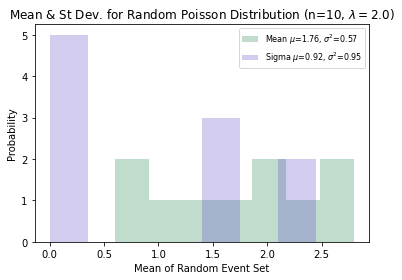

In [34]:
# Necessary imports
from scipy.stats import poisson

# M is the size of array for each event sampled
M = 5

# n is the number of trials
n = 10

# empty lists to append to 
event_list = []
mean_list = []
variance_list = []

# for loop for number of n samples taken
for i in range(n):
    # creating the new event. Required calculations and appending are done too
    event = poisson.rvs(mu=2.0, size=M)
    event_list.append(event)
    mean_event = np.mean(event)
    mean_list.append(mean_event)
    variance_event = st.stdev(event)
    variance_list.append(variance_event)
    
# calculating variance and mean of means and standard deviations of  to use in legend 
mean_mu = round(st.mean(mean_list),2)
mean_var = round((np.std(mean_list)**2),2)
st_mu = round(st.mean(variance_list),2)
st_var = round((np.std(variance_list)**2),2)
    
# Adding all labels, and details, to the plot and plotting mean
plt.hist(mean_list, bins = 7, color = 'seagreen', alpha = .3)
plt.hist(variance_list, bins = 7, color = 'slateblue', alpha = .3)
plt.xlabel('Mean of Random Event Set')
plt.ylabel('Probability')
plt.title('Mean & St Dev. for Random Poisson Distribution (n=10, $\lambda = 2.0$)')
plt.legend([ 'Mean ${\mu}$=' + str(mean_mu) + ', ${\sigma^{2}}$=' + str(mean_var),
            'Sigma ${\mu}$=' + str(st_mu) + ', ${\sigma^{2}}$=' + str(st_var)], prop={'size': 8})
plt.show()

For n=10, we can see that the generated means are very discrete as well as the generated standard deviations. As of n=10, there is no clear trend towards normal distributions as the question implies. One might infer that increasing n will trend it in this direction. 

2). Let N=100. Plot distributions of μ5 and σ5. For each plot, indicate the mean and variance in the legend.

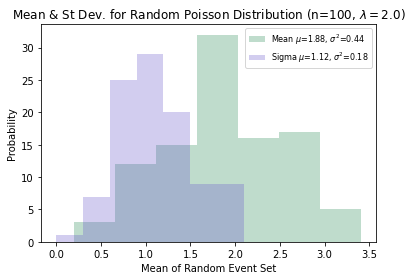

In [35]:
# Necessary imports
from scipy.stats import poisson

# M is the size of array for each event sampled
M = 5

# n is the number of trials
n = 100

# empty lists to append to 
event_list = []
mean_list = []
variance_list = []

# for loop for number of n samples taken
for i in range(n):
    # creating the new event. Required calculations and appending are done too
    event = poisson.rvs(mu=2.0, size=M)
    event_list.append(event)
    mean_event = np.mean(event)
    mean_list.append(mean_event)
    variance_event = np.sqrt(event.var())
    variance_list.append(variance_event)
    
    
# calculating variance and mean of means and standard deviations of  to use in legend 
mean_mu = round(st.mean(mean_list),2)
mean_var = round((np.std(mean_list)**2),2)
st_mu = round(st.mean(variance_list),2)
st_var = round((np.std(variance_list)**2),2)

# Adding all labels, and details, to the plot and plotting mean
plt.hist(mean_list, bins = 7, color = 'seagreen', alpha = .3)
plt.hist(variance_list, bins = 7, color = 'slateblue', alpha = .3)
plt.xlabel('Mean of Random Event Set')
plt.ylabel('Probability')
plt.title('Mean & St Dev. for Random Poisson Distribution (n=100, $\lambda = 2.0$)')
plt.legend([ 'Mean ${\mu}$=' + str(mean_mu) + ', ${\sigma^{2}}$=' + str(mean_var),
            'Sigma ${\mu}$=' + str(st_mu) + ', ${\sigma^{2}}$=' + str(st_var)], prop={'size': 8})
plt.show()

For n=100, we can see that more generated sets of samples has led to less discrete values and more of an actual distribution. We can see the start of an actual nor al distribution starting to come together as there is one middle value for both the mean and the standard deviation which is the highest, and at the sides the values trail off. Although it is still not a perfect normal distribution.

3). Let N=1000. Plot distributions of μ5 and σ5. For each plot, indicate the mean and variance in the legend.

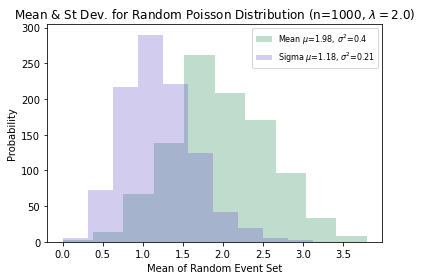

In [36]:
# Necessary imports
from scipy.stats import poisson

# M is the size of array for each event sampled
M = 5

# n is the number of trials
n = 1000

# empty lists to append to 
event_list = []
mean_list = []
variance_list = []

# for loop for number of n samples taken
for i in range(n):
    # creating the new event. Required calculations and appending are done too
    event = poisson.rvs(mu=2.0, size=M)
    event_list.append(event)
    mean_event = np.mean(event)
    mean_list.append(mean_event)
    variance_event = np.sqrt(event.var())
    variance_list.append(variance_event)

# calculating variance and mean of means and standard deviations of  to use in legend 
mean_mu = round(st.mean(mean_list),2)
mean_var = round((np.std(mean_list)**2),2)
st_mu = round(st.mean(variance_list),2)
st_var = round((np.std(variance_list)**2),2)
    
# Adding all labels, and details, to the plot and plotting mean
plt.hist(mean_list, bins = 10, color = 'seagreen', alpha = .3)
plt.hist(variance_list, bins = 10, color = 'slateblue', alpha = .3)
plt.xlabel('Mean of Random Event Set')
plt.ylabel('Probability')
plt.title('Mean & St Dev. for Random Poisson Distribution (n=1000, $\lambda = 2.0$)')
plt.legend([ 'Mean ${\mu}$=' + str(mean_mu) + ', ${\sigma^{2}}$=' + str(mean_var),
            'Sigma ${\mu}$=' + str(st_mu) + ', ${\sigma^{2}}$=' + str(st_var)], prop={'size': 8})
plt.show()

For n=1000, we can see that there is clearly a trend where increasing n will lead to more normal distributions for the mean and standard deviation. Although there could still be improvement as some means are still more common than others. With a larger n or m value, the random poisson values will lead to a better normal distribution.

4). Discuss your obersvation.
a. Does μ5 and σ5 approach Normal distributions when N is approaching a larger number?
b. Is the variance of μ5 and σ5 following some scaling rule as functio of N?

According to the plots, mu5 and sigma5 both approach normal distributions when N is a larger number. It is clear to see as the data starts to come together, that normal distributions occur for the mean and standard deviations of the randomly sampled poisson data. When dealing with the central limit theorem, the standard deviation (standard error of the mean) of mu5 and sigma5 will scale as $\frac{1}{n}$ and the variance will scale as $\frac{1}{\sqrt{n}}$.

5). Fix N=1000, plot distribution of μ100and σ100 which are mean and standard deviation of a sample of M=100 events with λ=2.0. Discuss your observation.

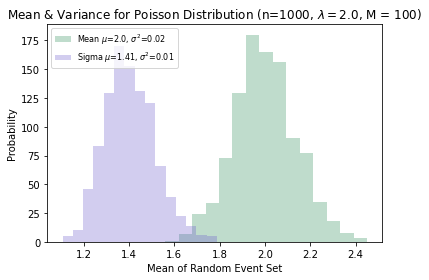

In [37]:
# Necessary imports
from scipy.stats import poisson

# M is the size of array for each event sampled
M = 100

# n is the number of trials
n = 1000

# empty lists to append to 
event_list = []
mean_list = []
variance_list = []

# for loop for number of n samples taken
for i in range(n):
    # creating the new event. Required calculations and appending are done too
    event = poisson.rvs(mu=2.0, size=M)
    event_list.append(event)
    mean_event = np.mean(event)
    mean_list.append(mean_event)
    variance_event = np.sqrt(event.var())
    variance_list.append(variance_event)

# calculating variance and mean of means and standard deviations of  to use in legend 
mean_mu = round(st.mean(mean_list),2)
mean_var = round((np.std(mean_list)**2),2)
st_mu = round(st.mean(variance_list),2)
st_var = round((np.std(variance_list)**2),2)


# Adding all labels, and details, to the plot and plotting mean
plt.hist(mean_list, bins = 15, color = 'seagreen', alpha = .3)
plt.hist(variance_list, bins = 15, color = 'slateblue', alpha = .3)
plt.xlabel('Mean of Random Event Set')
plt.ylabel('Probability')
plt.title('Mean & Variance for Poisson Distribution (n=1000, $\lambda = 2.0$, M = 100)')
plt.legend([ 'Mean ${\mu}$=' + str(mean_mu) + ', ${\sigma^{2}}$=' + str(mean_var),
            'Sigma ${\mu}$=' + str(st_mu) + ', ${\sigma^{2}}$=' + str(st_var)], prop={'size': 8})
plt.show()

It is clear that increasing the M will also lead to a clearer normal distribution as the means are now very clear values for both the mean and sigma, and the variance is very obviously lower now. Therefore, increasing both n and M will lead to a clearer gaussian due to central limit theorem in this kind of scenario.

__Bonus (+3 points)__

Generate 1000 samples. Each sample is a 100 event dataset using one built-in distribution in scipy but not Binomial, Normal nor Poisson. Show that the mean and variance of these 1000 samples also behave like a Normal Distribution.

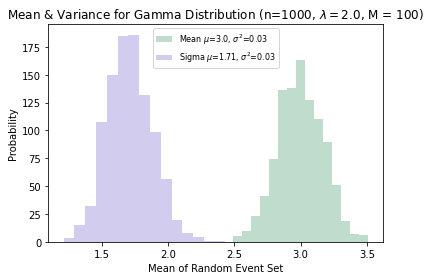

In [57]:
# Necessary imports
from scipy.stats import gamma

# M is the size of array for each event sampled
M = 100

# n is the number of trials
n = 1000

# empty lists to append to 
event_list = []
mean_list = []
variance_list = []

# for loop for number of n samples taken
for i in range(n):
    # creating the new event. Required calculations and appending are done too
    event = gamma.rvs(size=M, a=3)
    event_list.append(event)
    mean_event = np.mean(event)
    mean_list.append(mean_event)
    variance_event = np.sqrt(event.var())
    variance_list.append(variance_event)

# calculating variance and mean of means and standard deviations of  to use in legend 
mean_mu = round(st.mean(mean_list),2)
mean_var = round((np.std(mean_list)**2),2)
st_mu = round(st.mean(variance_list),2)
st_var = round((np.std(variance_list)**2),2)


# Adding all labels, and details, to the plot and plotting mean
plt.hist(mean_list, bins = 15, color = 'seagreen', alpha = .3)
plt.hist(variance_list, bins = 15, color = 'slateblue', alpha = .3)
plt.xlabel('Mean of Random Event Set')
plt.ylabel('Probability')
plt.title('Mean & Variance for Gamma Distribution (n=1000, $\lambda = 2.0$, M = 100)')
plt.legend([ 'Mean ${\mu}$=' + str(mean_mu) + ', ${\sigma^{2}}$=' + str(mean_var),
            'Sigma ${\mu}$=' + str(st_mu) + ', ${\sigma^{2}}$=' + str(st_var)], prop={'size': 8})
plt.show()

It is clear that the mean and standard deviation of the gamma distribution under these conditions also behave like the normal distribution as seen from the plots of the mean and sigma. The variance for the gamma distribution's mean and sigma is both .3 which is low and contributes to the bell shaped curve that is observed. From this, we can deduce that the mean and standard deviations of random samples will approach normal distributions regardless of the distributions we were allowed to pick.